In [157]:
# !pip install tqdm==4.56.0

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False
path = 'malgun.ttf'
fontprop = fm.FontProperties(fname=path, size=8)

from IPython.display import display
from tqdm import tqdm

from shapely.geometry import Point,LineString,Polygon

In [138]:
# pop=gpd.read_file('3.용인시_인구정보(총인구수)_격자.geojson')
# order=gpd.read_file('4.용인시_인구정보(고령)_격자.geojson')
# generation=gpd.read_file('5.용인시_인구정보(생산가능)_격자.geojson')
# child=gpd.read_file('6.용인시_인구정보(유소년)_격자.geojson')

In [139]:
# display(set(pop.gid)-set(order.gid))
# display(set(pop.gid)-set(generation.gid))
# display(set(pop.gid)-set(child.gid))
# display(set(order.gid)-set(pop.gid))
# display(set(order.gid)-set(generation.gid))
# display(set(order.gid)-set(child.gid))
# display(set(generation.gid)-set(pop.gid))
# display(set(generation.gid)-set(order.gid))
# display(set(generation.gid)-set(child.gid))
# display(set(child.gid)-set(pop.gid))
# display(set(child.gid)-set(order.gid))
# display(set(child.gid)-set(generation.gid))

In [140]:
# pop=pop.rename(columns={'val':'총인구수'})
# pop=pop.fillna(0)
# order=order.rename(columns={'val':'고령자수'})
# order=order.fillna(0)
# generation=generation.rename(columns={'val':'생산가능인구'})
# generation=generation.fillna(0)
# child=child.rename(columns={'val':'유소년수'})
# child=child.fillna(0)

In [141]:
# data=pd.concat([pop,order['고령자수'],generation['생산가능인구'],child['유소년수']],axis=1)
# data=data[['gid','geometry','총인구수','고령자수','생산가능인구','유소년수']]
# data.head()

In [142]:
# https://geopandas.readthedocs.io/en/latest/docs/user_guide/io.html
# import fiona; fiona.supported_drivers

# data.to_file("용인3-6.geojson", driver='GeoJSON')

In [16]:
data=gpd.read_file('용인3-6.geojson')

In [18]:
data['고령자비율']=data['고령자수']/data['총인구수']
data['생산가능인구비율']=data['생산가능인구']/data['총인구수']
data['유소년비율']=data['유소년수']/data['총인구수']

data=data.dropna().reset_index(drop=True)

In [145]:
sigungu=gpd.read_file('11.용인시_법정경계(시군구).geojson')
sigungu.head()

,SIG_CD,SIG_KOR_NM,geometry
0,41461,용인시처인구,"MULTIPOLYGON (((127.10873 37.12385, 127.10874 ..."
1,41463,용인시기흥구,"MULTIPOLYGON (((127.06526 37.26919, 127.06525 ..."
2,41465,용인시수지구,"MULTIPOLYGON (((127.02966 37.37213, 127.02975 ..."


In [21]:
# 구 분류
for idx,point in tqdm(enumerate(data['geometry'])):
    for name,area in zip(sigungu['SIG_KOR_NM'],sigungu['geometry']):
        if point.within(area):
            data.loc[idx,'SIG_KOR_NM']=name

# 뒤에걸로.
data['SIG_KOR_NM'].fillna(method='bfill',inplace=True)

0it [00:00, ?it/s]


NameError: name 'sigungu' is not defined

In [147]:
# 고령자도 많으면서 
# 생산가능인구도 많고
# 유소년 인구까지 많은.

# 고령자 비율
display(data[data['고령자비율']>0.7]['SIG_KOR_NM'].value_counts(normalize=True))
# 생산가능 인구비율
display(data[data['생산가능인구비율']>0.5]['SIG_KOR_NM'].value_counts(normalize=True))
# 유소년수 비율
display(data[data['유소년비율']>0.3]['SIG_KOR_NM'].value_counts(normalize=True))

용인시처인구    0.762376
용인시기흥구    0.188119
용인시수지구    0.049505
Name: SIG_KOR_NM, dtype: float64

용인시처인구    0.472412
용인시기흥구    0.314021
용인시수지구    0.213567
Name: SIG_KOR_NM, dtype: float64

용인시처인구    0.423529
용인시기흥구    0.400000
용인시수지구    0.176471
Name: SIG_KOR_NM, dtype: float64

In [2]:
dong=gpd.read_file('12.용인시_법정경계(읍면동).geojson')
dong.head()

,EMD_CD,EMD_KOR_NM,geometry
0,41461101,김량장동,"MULTIPOLYGON (((127.19037 37.23145, 127.19042 ..."
1,41461102,역북동,"MULTIPOLYGON (((127.16958 37.22514, 127.16962 ..."
2,41461103,삼가동,"MULTIPOLYGON (((127.14917 37.24079, 127.14957 ..."
3,41461104,남동,"MULTIPOLYGON (((127.17458 37.22458, 127.17487 ..."
4,41461105,유방동,"MULTIPOLYGON (((127.17158 37.26933, 127.17216 ..."


In [22]:
# 구 분류
for idx,point in tqdm(enumerate(data['geometry'])):
    for name,area in zip(dong['EMD_KOR_NM'],dong['geometry']):
        if point.within(area):
            data.loc[idx,'EMD_KOR_NM']=name

# 뒤에걸로.
data['EMD_KOR_NM'].fillna(method='bfill',inplace=True)

7625it [00:17, 437.09it/s]


In [15]:
data.groupby('')

,gid,총인구수,고령자수,생산가능인구,유소년수,geometry,고령자비율,생산가능인구비율,유소년비율,EMD_KOR_NM
0,다바665993,8.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.12304 37.09173, 127.12304 ...",0.000000,0.000000,0.0,남사면
1,다바666992,9.0,0.0,6.0,0.0,"MULTIPOLYGON (((127.12417 37.09083, 127.12417 ...",0.000000,0.666667,0.0,남사면
2,다바666993,7.0,0.0,6.0,0.0,"MULTIPOLYGON (((127.12417 37.09174, 127.12416 ...",0.000000,0.857143,0.0,남사면
3,다바667991,12.0,0.0,11.0,0.0,"MULTIPOLYGON (((127.12530 37.08994, 127.12530 ...",0.000000,0.916667,0.0,남사면
4,다바667992,27.0,13.0,14.0,0.0,"MULTIPOLYGON (((127.12530 37.09084, 127.12529 ...",0.481481,0.518519,0.0,남사면
...,...,...,...,...,...,...,...,...,...,...
7620,다사925027,6.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.41557 37.12295, 127.41557 ...",0.000000,0.000000,0.0,백암면
7621,다사925028,10.0,9.0,0.0,0.0,"MULTIPOLYGON (((127.41557 37.12385, 127.41557 ...",0.900000,0.000000,0.0,백암면
7622,다사925029,6.0,0.0,6.0,0.0,"MULTIPOLYGON (((127.41557 37.12475, 127.41557 ...",0.000000,1.000000,0.0,백암면
7623,다사926039,7.0,0.0,6.0,0.0,"MULTIPOLYGON (((127.41669 37.13377, 127.41668 ...",0.000000,0.857143,0.0,백암면


In [148]:
# pop=pd.read_csv('7.용인시_유동인구.csv')
# m2=gpd.read_file('12.용인시_법정경계(읍면동).geojson')

In [149]:
# m2['구']=['처인구']*17+['기흥구']*18+['수지구']*7

# address=[]
# for x,y in tqdm(pop[['lon','lat']].values):
#     l=len(address)
#     for i in range(42):
#         if Point(x,y).within(m2['geometry'].iloc[i]):
#             address.append('경기도 용인시 '+m2.iloc[i]['구']+' '+m2.iloc[i]['EMD_KOR_NM'])
#             break
#     m=len(address)
#     if l==m:
#         address.append('null')

In [150]:
# display(pop.index.nunique())
# display(len(address))

# pop['주소']=address

In [151]:
# pop.to_csv('population.csv',index=False)

In [152]:
pop=pd.read_csv('population.csv')

pop=pop.drop(['lon','lat'],axis=1).groupby(['주소','STD_YM']).agg('sum').reset_index()

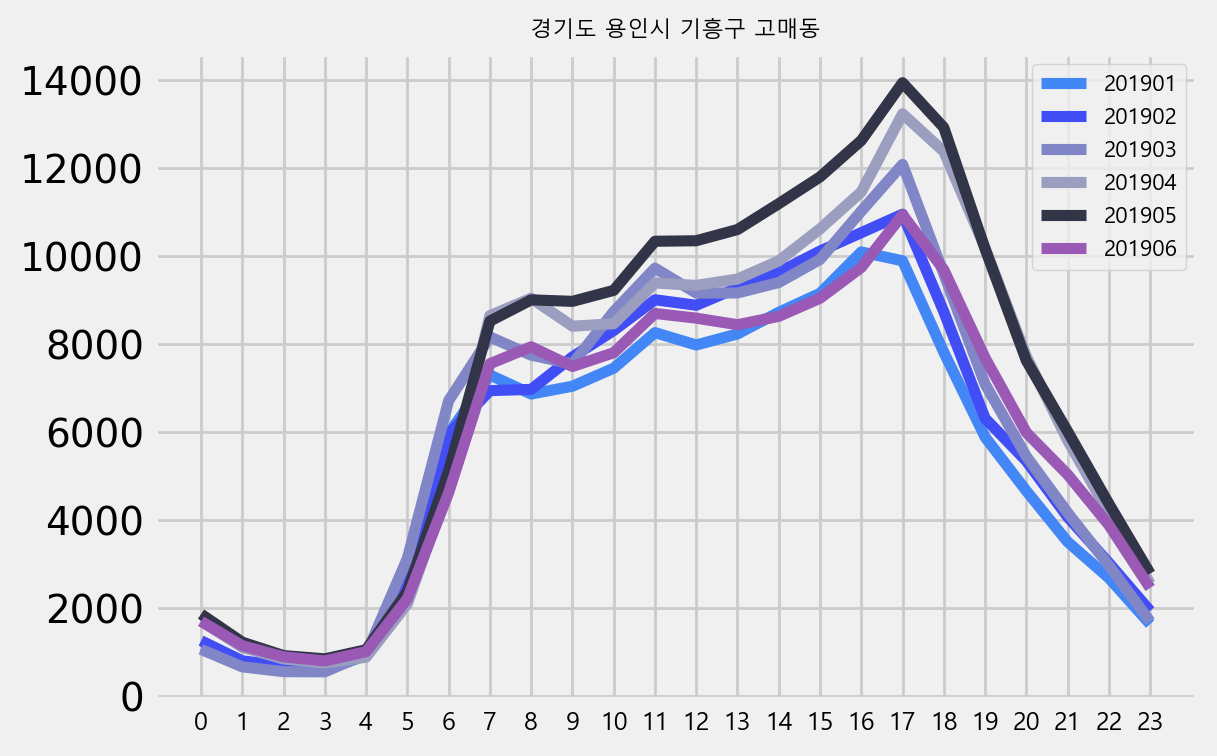

In [153]:
# 유동인구 보기.

time=['TMST_00', 'TMST_01', 'TMST_02', 'TMST_03', 'TMST_04','TMST_05',
      'TMST_06', 'TMST_07', 'TMST_08', 'TMST_09', 'TMST_10','TMST_11',
      'TMST_12', 'TMST_13', 'TMST_14', 'TMST_15', 'TMST_16','TMST_17',
      'TMST_18', 'TMST_19', 'TMST_20', 'TMST_21', 'TMST_22','TMST_23']

dates=[201901,201902,201903,201904,201905,201906]
colors=['#4287f5','#424ef5','#8186c7','#9b9ebf','#323447','#9959b5']

for addr in pop['주소'].unique():
    df=pop[pop['주소']==addr]
    fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=200)
    for date,color in zip(dates,colors):
        tmp=df[df['STD_YM']==date]
        title=tmp['STD_YM'].tolist()[0]
        transform_tmp=tmp[time].T
        transform_tmp.columns=['시간대']
        ax.plot(range(24),transform_tmp,color=color,label=date)
    ax.set_xticks(range(24))
    ax.set_xticklabels(range(24),fontproperties=fontprop,fontsize=9)
    ax.set_title(f"{addr}",fontproperties=fontprop)
    ax.legend(prop=fontprop,fontsize=2)
    break

plt.show()

In [223]:
pop_201901=pop[pop['STD_YM']==201901].set_index('주소')
pop_201901.sum(axis=1).sort_values(ascending=False)[:15]

# 처인구 양지면, 포곡읍, 이동읍, 모현읍 , 남사면 주위 보기.

주소
경기도 용인시 수지구 죽전동     499382.90
경기도 용인시 수지구 풍덕천동    481658.80
경기도 용인시 기흥구 보정동     477103.56
경기도 용인시 기흥구 신갈동     453538.76
경기도 용인시 처인구 양지면     442583.35
경기도 용인시 수지구 상현동     430704.53
경기도 용인시 처인구 포곡읍     427251.56
경기도 용인시 기흥구 마북동     392855.59
경기도 용인시 기흥구 영덕동     387173.33
경기도 용인시 기흥구 구갈동     343052.93
경기도 용인시 처인구 이동읍     342819.96
경기도 용인시 처인구 모현읍     337550.35
경기도 용인시 기흥구 고매동     331666.87
경기도 용인시 기흥구 중동      331496.09
경기도 용인시 처인구 남사면     327289.28
dtype: float64

In [226]:
dong=gpd.read_file('12.용인시_법정경계(읍면동).geojson')
store=pd.read_csv('1.용인시_상권_정보.csv')

In [246]:
points=gpd.GeoDataFrame(store[['경도','위도']])

In [250]:
for row in tqdm(points.itertuples()):
    lng=getattr(row,'경도')
    lat=getattr(row,'위도')
    points['geometry']=Point(lng,lat)
points=pd.DataFrame(points)

39906it [00:19, 2085.67it/s]


In [291]:
# 양지면,모현읍,이동읍 순으로 산업이 많다.

# store[store['행정동명']=='모현읍']['표준산업분류명'].value_counts()
# store[store['행정동명']=='양지면']['표준산업분류명'].value_counts()[:10]
# store[store['행정동명']=='이동읍']['표준산업분류명'].value_counts()

가림막

In [159]:
# structure=gpd.read_file('8.용인시_도로명주소_건물.geojson')
# display(structure.shape)
# display(structure.head())

In [160]:
# # 구 분류
# for idx,point in tqdm(enumerate(structure['geometry'])):
#     for name,area in zip(sigungu['SIG_KOR_NM'],sigungu['geometry']):
#         if point.within(area):
#             structure.loc[idx,'SIG_KOR_NM']=name
#             break

# # 뒤에걸로.
# structure['SIG_KOR_NM'].fillna(method='bfill',inplace=True)
# display(structure.head())

In [161]:
# structure.to_file("용인8.geojson", driver='GeoJSON')

In [162]:
structure=gpd.read_file('용인8.geojson')

In [188]:
sigungu['geometry']=sigungu['geometry'].set_crs({'init':'epsg:6933'})

sigungu['건물수']=[20369,9006,71440]
sigungu['밀집도(%)']=sigungu['건물수']/sigungu['geometry'].area*100

In [203]:
# 밀집도
structure.groupby(['SIG_KOR_NM'])['BDTYP_CD'].count()

SIG_KOR_NM
용인시기흥구    20369
용인시수지구     9006
용인시처인구    71440
Name: BDTYP_CD, dtype: int64